In [23]:
# Step 1: Setup and imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
np.random.seed(42)


In [24]:
# Step 2: Load California Housing Dataset
from sklearn.datasets import fetch_california_housing

california = fetch_california_housing(as_frame=True)
X = california.data
y = california.target  # median house value (in $100,000s)

print("Shape of dataset:", X.shape)
print("Feature names:", list(X.columns))
print("\nSample data:")
display(X.head())


Shape of dataset: (20640, 8)
Feature names: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']

Sample data:


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


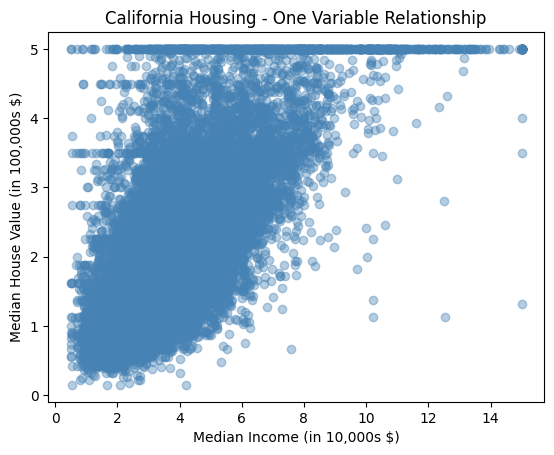

In [25]:
# Step 3: Simple linear regression with one variable
# Let's use 'MedInc' (median income) since it correlates strongly with house prices
X_single = X[['MedInc']].values
y_single = y.values.reshape(-1, 1)

plt.scatter(X_single, y_single, color='steelblue', alpha=0.4)
plt.xlabel("Median Income (in 10,000s $)")
plt.ylabel("Median House Value (in 100,000s $)")
plt.title("California Housing - One Variable Relationship")
plt.show()


In [26]:
# Step 4: Helper functions (loss & metrics)
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def r2_score(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred)**2)
    ss_tot = np.sum((y_true - np.mean(y_true))**2)
    return 1 - ss_res/ss_tot


In [27]:
# Step 5: Manual Linear Regression using Gradient Descent
class ManualLinearRegression:
    def __init__(self, lr=0.01, epochs=1000):
        self.lr = lr
        self.epochs = epochs
        self.w = None
        self.b = 0.0

    def fit(self, X, y):
        m, n = X.shape
        y = y.reshape(-1, 1)
        self.w = np.zeros((n, 1))
        self.b = 0.0

        for epoch in range(self.epochs):
            y_pred = X.dot(self.w) + self.b
            dw = (-2/m) * X.T.dot(y - y_pred)
            db = (-2/m) * np.sum(y - y_pred)
            self.w -= self.lr * dw
            self.b -= self.lr * db

            if epoch % 500 == 0:
                cost = mse(y, y_pred)
                print(f"Epoch {epoch}, MSE: {cost:.4f}")

    def predict(self, X):
        return X.dot(self.w) + self.b


Epoch 0, MSE: 5.6105
Epoch 500, MSE: 0.7011
Epoch 1000, MSE: 0.7011
Epoch 1500, MSE: 0.7011
Epoch 2000, MSE: 0.7011
Epoch 2500, MSE: 0.7011

Simple Linear Regression Results:
MSE: 0.7011
R²: 0.4734


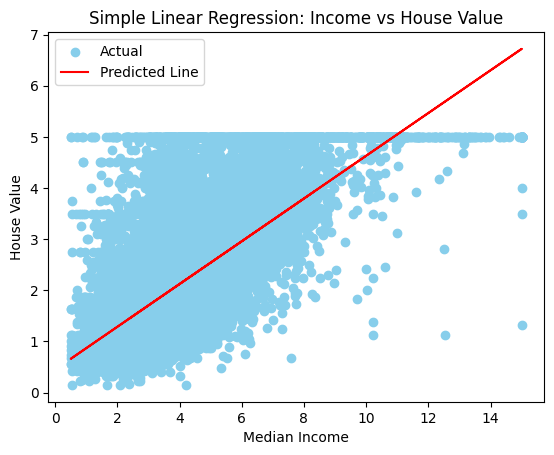

In [28]:
# Step 6: Fit simple regression model
model_simple = ManualLinearRegression(lr=0.05, epochs=3000)
model_simple.fit(X_single, y_single)

# Predictions
y_pred_single = model_simple.predict(X_single)

print("\nSimple Linear Regression Results:")
print(f"MSE: {mse(y_single, y_pred_single):.4f}")
print(f"R²: {r2_score(y_single, y_pred_single):.4f}")

# Visualization
plt.scatter(X_single, y_single, color='skyblue', label='Actual')
plt.plot(X_single, y_pred_single, color='red', label='Predicted Line')
plt.xlabel("Median Income")
plt.ylabel("House Value")
plt.title("Simple Linear Regression: Income vs House Value")
plt.legend()
plt.show()


In [29]:
# Step 7: Multiple linear regression on all features
from sklearn.model_selection import train_test_split

X_multi = X.values
y_multi = y.values.reshape(-1, 1)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_multi, y_multi, test_size=0.2, random_state=42)

# Standardize
mean = X_train.mean(axis=0)
std = X_train.std(axis=0) + 1e-12
X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

# Train
model_multi = ManualLinearRegression(lr=0.01, epochs=3000)
model_multi.fit(X_train, y_train)

# Predictions
y_pred_train = model_multi.predict(X_train)
y_pred_test = model_multi.predict(X_test)

print("\nMultiple Linear Regression Results:")
print(f"Train MSE: {mse(y_train, y_pred_train):.4f}")
print(f"Test MSE:  {mse(y_test, y_pred_test):.4f}")
print(f"Train R²:  {r2_score(y_train, y_pred_train):.4f}")
print(f"Test R²:   {r2_score(y_test, y_pred_test):.4f}")


Epoch 0, MSE: 5.6297
Epoch 500, MSE: 0.5477
Epoch 1000, MSE: 0.5246
Epoch 1500, MSE: 0.5196
Epoch 2000, MSE: 0.5184
Epoch 2500, MSE: 0.5181

Multiple Linear Regression Results:
Train MSE: 0.5180
Test MSE:  0.5563
Train R²:  0.6125
Test R²:   0.5755


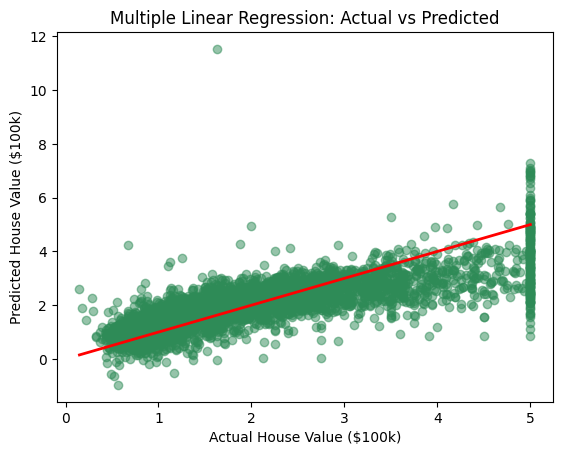

In [30]:
# Step 8: Visualization - Predicted vs Actual prices
plt.scatter(y_test, y_pred_test, color='seagreen', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.xlabel("Actual House Value ($100k)")
plt.ylabel("Predicted House Value ($100k)")
plt.title("Multiple Linear Regression: Actual vs Predicted")
plt.show()
